# E03 Low-level image processing

### Gianluca Scuri 886725

Experiment with the compression of a color image by blurring the channels of the YCbCr representation, following the guidelines shown during the laboratory.

Rules:
1. Use a custom image (different from the ones provided).
2. Show the effect of blurring only the luma channel, and the effect of blurring only the chroma channels.
3. Experiment with, and show, the impact of blurring with visibly different intensities.
4. For the purpose of the assignment, you are not expected to save the images and evaluate the file size.
5. You can (and should) use ready-made functions for the color conversion and for the gaussian filtering.

In [16]:
import numpy as np
from matplotlib import pyplot as plt

# Image management
from skimage import io # Input/output
from skimage import transform # Geometric transformations (e.g. resize)
from skimage import filters # Local processing
from skimage import color # Change of color space
from skimage.data import astronaut

# Set visualization size for figures (notebook only)
plt.rcParams['figure.figsize'] = [15,5] # width, height

## Caricamento immagine

Caricamento immagine presente in skimage.data e verifica dimensioni

In [17]:
image = astronaut()
image.shape

(512, 512, 3)

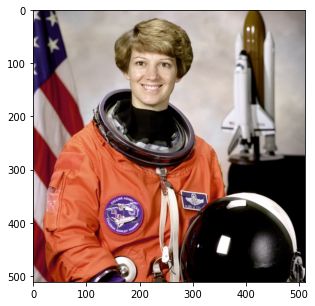

In [18]:
plt.imshow(image)

## Funzione per applicare Gaussian Blur ai singoli canali

La funzione permette di applicare un filtro gaussiano ai singoli canali Y, Cb, Cr partendo da un immagine RGB.

Parametri:
- `channels = (Y, Cb, Cr)` canali rispetto al quale compiere la compressione
- `sigma` valore di compressione

Step della funzione:
1. conversione dell'immagine da RGB a YCbCr
2. applicazione del filtro gaussiano di skimage ai canali Y, Cb, Cr richiesti
3. conversione da YCbCr a RGB
4. clip dei valori esterni all'intervallo [0, 1]

In [19]:
def compress_image(image, channels=(True, True, True), sigma = 1):
  # da RGB a YCbCr
  image_ycbcr = color.rgb2ycbcr(image)
  
  # applica il blur gaussiano ai canali richiesti
  for count, i in enumerate(channels):
    if i:
      image_ycbcr[:,:,count] = filters.gaussian(image_ycbcr[:,:,count], sigma = sigma)

  # da YCbCr a RGB
  image_comp = color.ycbcr2rgb(image_ycbcr)
  image_comp = np.clip(image_comp, 0, 1) # range dei valori tra 0 e 1

  return image_comp

## Blur luma channel

Blur del canale Y con `sigma = 2`

In [20]:
sigma = 2
image_comp = compress_image(image, channels=(True,False,False), sigma=sigma)

Text(0.5, 1.0, 'Blur luma channel (sigma=2)')

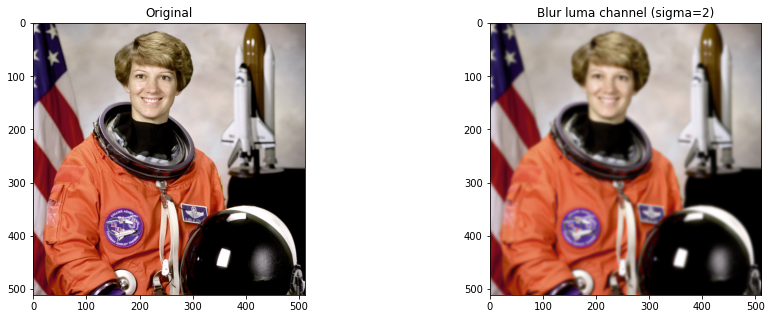

In [21]:
plt.subplot(1,2,1), plt.imshow(image); plt.title('Original')
plt.subplot(1,2,2), plt.imshow(image_comp); plt.title(f'Blur luma channel (sigma={sigma})')

Applicando un filtro gaussiano con `sigma = 2` l'immagine risulta molto distorta, la figura é distinguibile ma i dettagli e i contorni non sono ben definiti.

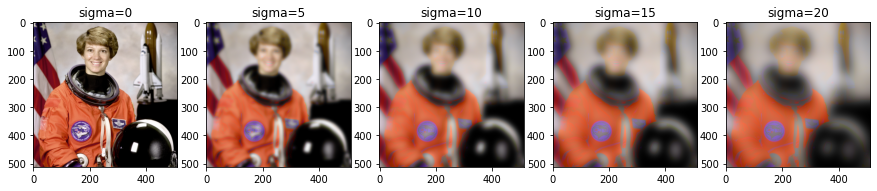

In [22]:
sigma_list = list(range(0,21,5)) # lista di valori [0,5,10,15,20]

for count, i in enumerate(sigma_list):
  image_comp = compress_image(image, channels=(True,False,False), sigma=i) # applica la funzione
  plt.subplot(1,len(sigma_list),count+1), plt.imshow(image_comp); plt.title(f'sigma={i}') # crea il subplot

Valutando un range di valori di sigma da 0 a 20 con separazione di 5 si nota che l'immagine giá dal valore 15 circa diventa irriconoscibile per via della grande perdita di dettaglio.

## Blur chroma channels

Blur dei canali Cb e Cr con `sigma = 2`

In [23]:
sigma = 2
image_comp = compress_image(image, channels=(False,True,True), sigma=sigma)

Text(0.5, 1.0, 'Blur chroma channels (sigma=2)')

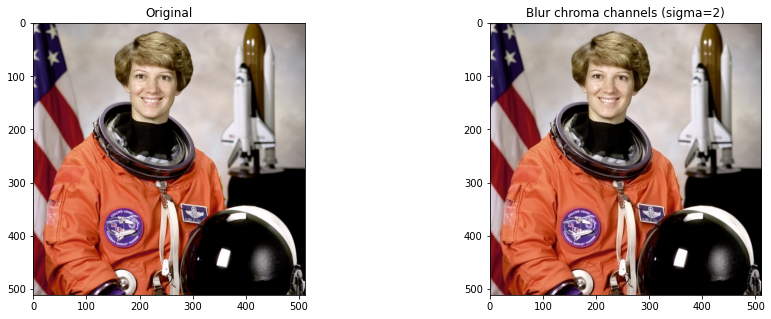

In [24]:
plt.subplot(1,2,1), plt.imshow(image); plt.title('Original')
plt.subplot(1,2,2), plt.imshow(image_comp); plt.title(f'Blur chroma channels (sigma={sigma})')

Applicando un filtro gaussiano con `sigma = 2` l'immagine risulta molto simile all'originale, c'é solo una leggera distorsione dei colori della tuta dall'astronauta.

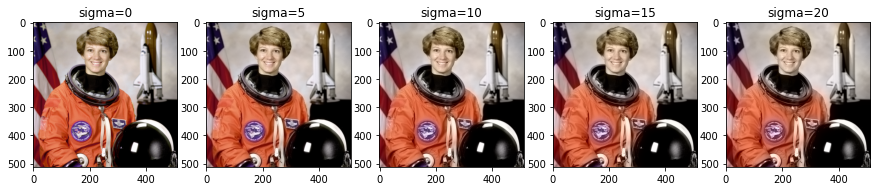

In [25]:
sigma_list = list(range(0,21,5)) # lista di valori [0,5,10,15,20]

for count, i in enumerate(sigma_list):
  image_comp = compress_image(image, channels=(False,True,True), sigma=i) # applica la funzione
  plt.subplot(1,len(sigma_list),count+1), plt.imshow(image_comp); plt.title(f'sigma={i}') # crea il subplot

Valutando un range di valori di sigma da 0 a 20 con separazione di 5 si nota che l'immagine risulta sempre essere riconoscibile. Il degrado ha infatti interessato solo i colori che dal valore sigma di 10 circa risultano piú spenti.